# 基本的图像变换方法

图像的变换是运用某些方法将图像从一个图像空间转换到另一个图像空间，同时改变图像中的像素值。图像的变换在视觉领域是比较常见的操作，在处理图片的时候我们经常能够用到旋转、平移、翻转等变换方法。下图是图像变换的例子。

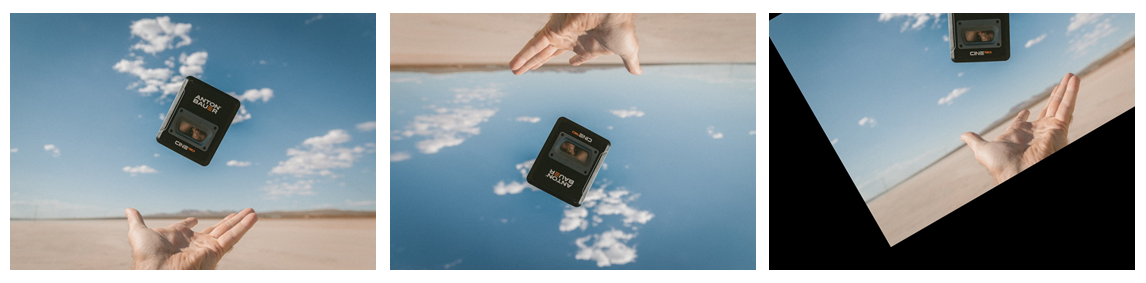

图像的缩放处理是常见的变换方法，在修图软件中常常会用到。在图像拼接时我们常常会将图片旋转、平移、翻转，在画面数字编辑和游戏制作过程中会经常使用这些方法对图像进行处理。深度学习领域我们常常会用到这些图像处理方法来处理数据集。下面我们将介绍一些常见的变换。

# 尺寸调整

在终端使用下面命令下载本次实验所需图片，并使用 unzip images.zip 命令解压压缩包。

有时候我们需要将尺寸过大的图片调整到一个相对合适的大小，反之较小尺寸的图片也需要扩增其尺寸。我们可以使用 cv2.resize 函数来实现尺寸调整。首先我们在 /home/project 目录下创建 args.py 文件

In [3]:
%run args.py --image images/cup.jpg

接下来我们将使用 cv2.resize 函数来对图片的尺寸进行缩放，该函数的第一个参数 image 是要被缩放的图片。第二个参数 (0, 0) 是一个元组，表示输出图片的尺寸，元组内的第一个元素表示图片的宽，第二个表示图片的高，后面会解释为什么这里将此参数设置为 (0, 0)。第三参数 fx = 0.5 表示沿图片的宽的缩放系数，第四参数 fy = 0.5 表示沿图片的高的缩放系数。第五个参数 interpolation = cv2.INTER_AREA) 是插值方法，表明图片是用哪种方法被缩放的，cv2.resize 默认的插值方法是 cv2.INTER_LINEAR，大家也可以尝试使用其他方法： cv2.INTER_NEAREST、cv2.INTER_CUBIC、cv2.INTER_LANCZ0S4。我们也可以尝试定义输出图片尺寸来对图片进行缩放。

In [2]:
import cv2
import argparse


In [4]:
resized = cv2.resize(image, (0, 0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
cv2.imwrite("resized.jpg",resized)

True

我们可以使用另一种方法对图片进行缩放，我们可以事先定义缩放后的图片的尺寸。首先我们先通过 shape 方法获取原始图片的高和宽。

In [5]:
height,width = image.shape[:2]

下面代码中我们用 w 表示输出图片的宽，并将其赋值为 200 个像素。为了让输出图片保持纵横比避免图片被过度拉伸我们要计算缩放比例：缩放比例 = 定义的宽度 / 原图的宽度，即代码中的 200 / width。输出图片的高就等于原图的高乘以缩放比例，即代码中的 height * (200 / width)。这里要注意的是一定要用 int 函数把计算结果转换成整型，因为输出图片的尺寸要是整型。

In [7]:
w = 200
h = int(height*(200/width))
h

133

下面我们使用 cv2.resize 函数对图片进行缩放，这次我们的参数只有三个，第一个参数 image 是传入函数的原图片，第二参数 (w, h) 是输出图片的尺寸，第三个参数 interpolation = cv2.INTER_AREA 是插值方法。当然我们也可以先定义输出图片的高，根据输出图片的高计算缩放比例。最后我们使用 cv2.imwrite 保存图片。

In [9]:
resized = cv2.resize(image,(w,h),interpolation  = cv2.INTER_AREA)
cv2.imwrite("resized.jpg",resized)
resized.shape

(133, 200, 3)

我们用 resized.shape 来看一下缩放后图片的尺寸。

**现在我们来解决前面提到的为什么要将第二个参数，即输出尺寸设置为 (0, 0) 的问题，当将此参数设置为 (0, 0) 时，图片的输出尺寸由后面两个缩放系数 fx 和 fy 分别与函数的输入图片的宽和高相乘得出，当此参数不等于 (0, 0) 时，输出图片的尺寸等于我们自己设定的值。**

最后我们来看一下图片缩放的效果，左上角是使用缩放系数缩放的 0.5 倍的图片。左下角是事先定义尺寸的宽为 200 高为 133 的图片。右边的大图是我们的原始图片。

# 平移

图片的平移是让图片中所有的像素点沿着坐标轴移动相同的距离，视觉上看起来就是图片在进行上、下、左、右移动。在对图片进行平移前，我们在 args.py 文件第一行添加下面代码。

In [13]:
import numpy as np

In [11]:
%run args.py --image images/cup.jpg

In [12]:
height,weight = image.shape[:2]

In [15]:
M = np.float32([[1,0,100],[0,1,20]])
# 1,0,100,表示沿着水平方向移动100个像素
# 0,1,20代表在竖直方向移动50个像素


In [ ]:
translation = cv2.warpAffine(image, M, (width, height))
cv2.imwrite('translation1.jpg',translation)
# cv2.warpAffine()
# 第一个参数是需要平移的图片，第二个参数是平移的方式，第三个参数是图片的输出尺寸


True

In [20]:
# 换一种平移方法
M = np.float32([[1,0,-150],[0,1,-80]])
# 水平平移-150，竖直平移-80

In [21]:
translation = cv2.warpAffine(image,M,(width,height))
cv2.imwrite('translation2.jpg',translation)

True

# 旋转

图片的旋转是通过将图片的所有像素点按照相同的方向和角度，围绕一个定点旋转实现的。可以通过结合 cv2.getRotationMatrix2D 和 cv2.warpAffine 实现。要进行旋转操作我们首先需要构造一个旋转矩阵，我们使用 cv2.getRotationMatrix2D 来构造一个这样的矩阵。

In [23]:
M = cv2.getRotationMatrix2D((50,50),30,1)
# 第一个参数表示，图片中的点围绕(50,50)旋转
# 第二个参数是旋转多少度
# 第三个1表示不缩放

In [24]:
rotation = cv2.warpAffine(image,M,(width,height))
cv2.imwrite("rotation.jpg",rotation)

True

In [28]:
M = cv2.getRotationMatrix2D((50, 50), -60, 0.5)
# 围绕(50,50)顺时针旋转60度，缩放0.5倍

In [29]:
rotation = cv2.warpAffine(image,M,(width,height))
cv2.imwrite('rotation2.jpg',rotation)

True

# 翻转

包括水平和竖直,赢cv2.flip

In [34]:
turn = cv2.flip(image,1)
cv2.imwrite('turn1.jpg',turn)
# 1表示水平翻转

True

In [ ]:
turn = cv2.flip(image,0)
cv2.imwrite('turn2.jpg',turn)
# 竖直

True

In [36]:
turn = cv2.flip(image,-1)
cv2.imwrite('turn3.jpg',turn) # -1表示水平竖直都翻转

True